Path to downloaded dataset: /Users/paolomac/.cache/kagglehub/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020/versions/2
Dataset already available in directory: /Users/paolomac/.cache/kagglehub/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020/versions/2
Files in the directory: ['ai4i2020.csv']

First 5 rows of the original dataset:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0



Original dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtyp

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}


Model trained on the original dataset with tuned hyperparameters.

Performance Metrics on Original Dataset:


,ROC AUC,R²,Adjusted R²
Dataset,,,
Training,1.00,0.97,0.97
Test,0.99,0.95,0.95


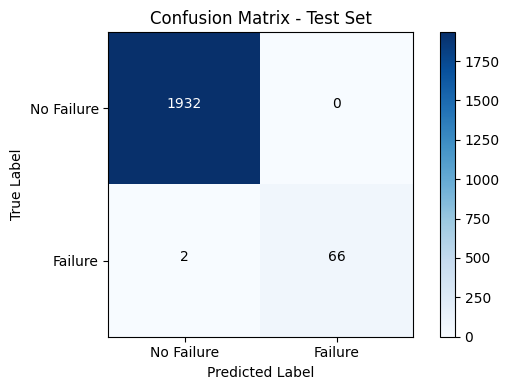

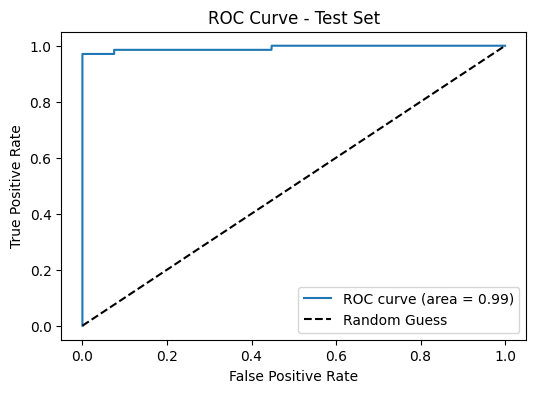


Synthetic dataset created:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,P25795,L,299.8,307.8,1582,45.2,8,0,0,0,0,0,0
1,2,P10860,M,297.6,305.7,1511,42.9,20,0,0,0,0,0,0
2,3,P86820,M,296.6,308.0,1528,46.0,26,0,0,0,0,0,0
3,4,P64886,M,296.7,308.8,1488,45.0,0,0,0,0,0,0,0
4,5,P16265,M,298.1,308.5,1465,41.8,22,0,0,0,0,0,0



Synthetic target distribution:
Machine failure
0    973
1     27
Name: count, dtype: int64

Performance Metrics on Synthetic Dataset:


,ROC AUC,R²,Adjusted R²
Dataset,,,
Synthetic,0.51,-0.02,-0.03



Sample Predictions from Training Dataset:


/var/folders/px/v2lc6219771gxwrr1tldygk40000gn/T/ipykernel_3866/4215987804.py:261: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_train_results = train_results.style.applymap(color_prediction, subset=["Prediction"])


,Machine,Prediction
0,Prod. Machine 1,0
1,Prod. Machine 2,0
2,Prod. Machine 3,0
3,Prod. Machine 4,0
4,Prod. Machine 5,0
5,Prod. Machine 6,0
6,Prod. Machine 7,0
7,Prod. Machine 8,0
8,Prod. Machine 9,0
9,Prod. Machine 10,0



Sample Predictions from Synthetic Dataset:


/var/folders/px/v2lc6219771gxwrr1tldygk40000gn/T/ipykernel_3866/4215987804.py:273: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_synth_results = synth_results.style.applymap(color_prediction, subset=["Prediction"])


,Machine,Prediction
0,Synthetic Machine 1,0
1,Synthetic Machine 2,0
2,Synthetic Machine 3,0
3,Synthetic Machine 4,0
4,Synthetic Machine 5,0
5,Synthetic Machine 6,0
6,Synthetic Machine 7,0
7,Synthetic Machine 8,0
8,Synthetic Machine 9,0
9,Synthetic Machine 10,0



Testing on synthetic dataset completed.


In [2]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             r2_score, roc_curve)
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import display, HTML

import kagglehub

# ===============================
# PART 1: Train on the Original Dataset from Kaggle
# ===============================

# Download the dataset from Kaggle
dataset_identifier = "stephanmatzka/predictive-maintenance-dataset-ai4i-2020"
dataset_path = kagglehub.dataset_download(dataset_identifier)
print("Path to downloaded dataset:", dataset_path)

# Use the returned directory if it's a folder
if os.path.isdir(dataset_path):
    extracted_path = dataset_path
    print("Dataset already available in directory:", extracted_path)
else:
    extract_path = "ai4i2020_dataset"
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    extracted_path = extract_path
    print("Dataset extracted in:", extracted_path)

# List files in the directory
files = os.listdir(extracted_path)
print("Files in the directory:", files)

# Assume the CSV file is named "ai4i2020.csv"
csv_file = os.path.join(extracted_path, "ai4i2020.csv")
if not os.path.exists(csv_file):
    print("CSV file 'ai4i2020.csv' not found. Check the file names:")
    print(files)
    exit()
else:
    orig_data = pd.read_csv(csv_file)
    print("\nFirst 5 rows of the original dataset:")
    display(orig_data.head())

# Display dataset info and target distribution (target is "Machine failure")
print("\nOriginal dataset info:")
print(orig_data.info())
print("\nTarget distribution (Machine failure):")
print(orig_data['Machine failure'].value_counts())

# Remove identifier columns that are not useful for modeling
cols_to_drop = ["UDI", "Product ID", "Type"]
for col in cols_to_drop:
    if col in orig_data.columns:
        orig_data.drop(col, axis=1, inplace=True)

# Split original dataset into features and target
X_orig = orig_data.drop("Machine failure", axis=1)
y_orig = orig_data["Machine failure"]

# Fill missing values if any
X_orig.fillna(X_orig.mean(), inplace=True)

# Split the original dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_orig, y_orig, test_size=0.20, random_state=42, stratify=y_orig
)

# -------------------------------
# Extended Hyperparameter Tuning with GridSearchCV
# -------------------------------
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("\nBest hyperparameters found:")
display(grid_search.best_params_)

# Train the best estimator on the training set
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
print("\nModel trained on the original dataset with tuned hyperparameters.")

# -------------------------------
# Metrics on Original Dataset (Training and Test Splits)
# -------------------------------
y_train_prob = best_rf.predict_proba(X_train)[:, 1]
y_test_prob  = best_rf.predict_proba(X_test)[:, 1]

roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test  = roc_auc_score(y_test, y_test_prob)

r2_train = r2_score(y_train, y_train_prob)
r2_test  = r2_score(y_test, y_test_prob)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train, p = X_train.shape
n_test = X_test.shape[0]
adj_r2_train = adjusted_r2(r2_train, n_train, p)
adj_r2_test  = adjusted_r2(r2_test, n_test, p)

# Create a summary DataFrame for metrics
metrics_data = {
    'Dataset': ['Training', 'Test'],
    'ROC AUC': [roc_auc_train, roc_auc_test],
    'R²': [r2_train, r2_test],
    'Adjusted R²': [adj_r2_train, adj_r2_test]
}
metrics_df = pd.DataFrame(metrics_data).set_index('Dataset')

print("\nPerformance Metrics on Original Dataset:")
display(metrics_df.style.background_gradient(cmap='viridis').format("{:.2f}"))

# -------------------------------
# Plotting the Confusion Matrix for Test Data using matplotlib
# -------------------------------
cm_test = confusion_matrix(y_test, best_rf.predict(X_test))

plt.figure(figsize=(6, 4))
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Failure', 'Failure'])
plt.yticks(tick_marks, ['No Failure', 'Failure'])
thresh = cm_test.max() / 2.
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, format(cm_test[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# -------------------------------
# Plotting the ROC Curve for Test Data using matplotlib
# -------------------------------
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc='best')
plt.show()

# ===============================
# PART 2: Generate a Synthetic Dataset
# ===============================
np.random.seed(42)
n_samples_synth = 1000

# Generate synthetic identifiers
UDI_synth = np.arange(1, n_samples_synth + 1)
product_ids_synth = ["P" + str(np.random.randint(10000, 99999)) for _ in range(n_samples_synth)]
types_synth = np.random.choice(["M", "L"], size=n_samples_synth)

# Generate synthetic operational variables similar to original data
air_temp_synth = np.random.normal(loc=298, scale=2, size=n_samples_synth).round(1)
process_temp_synth = np.random.normal(loc=308, scale=2, size=n_samples_synth).round(1)
rot_speed_synth = np.random.randint(1400, 1601, size=n_samples_synth)
torque_synth = np.random.normal(loc=45, scale=5, size=n_samples_synth).round(1)
tool_wear_synth = np.random.randint(0, 31, size=n_samples_synth)

# Adjust failure probability to have ~3% failures
failure_prob_synth = (tool_wear_synth / 30.0) * 0.06
machine_failure_synth = np.random.binomial(1, failure_prob_synth)

# Other flag variables (set to 0)
TWF_synth = np.zeros(n_samples_synth, dtype=int)
HDF_synth = np.zeros(n_samples_synth, dtype=int)
PWF_synth = np.zeros(n_samples_synth, dtype=int)
OSF_synth = np.zeros(n_samples_synth, dtype=int)
RNF_synth = np.zeros(n_samples_synth, dtype=int)

synth_data = pd.DataFrame({
    "UDI": UDI_synth,
    "Product ID": product_ids_synth,
    "Type": types_synth,
    "Air temperature [K]": air_temp_synth,
    "Process temperature [K]": process_temp_synth,
    "Rotational speed [rpm]": rot_speed_synth,
    "Torque [Nm]": torque_synth,
    "Tool wear [min]": tool_wear_synth,
    "Machine failure": machine_failure_synth,
    "TWF": TWF_synth,
    "HDF": HDF_synth,
    "PWF": PWF_synth,
    "OSF": OSF_synth,
    "RNF": RNF_synth
})

print("\nSynthetic dataset created:")
display(synth_data.head())
print("\nSynthetic target distribution:")
print(synth_data["Machine failure"].value_counts())

# Preprocess the synthetic dataset: drop identifier columns
for col in cols_to_drop:
    if col in synth_data.columns:
        synth_data.drop(col, axis=1, inplace=True)

X_synth = synth_data.drop("Machine failure", axis=1)
y_synth = synth_data["Machine failure"]
X_synth.fillna(X_synth.mean(), inplace=True)

# Evaluate the model on the synthetic dataset
synth_predictions = best_rf.predict(X_synth)
synth_probabilities = best_rf.predict_proba(X_synth)[:, 1]

roc_auc_synth = roc_auc_score(y_synth, synth_probabilities)
r2_synth = r2_score(y_synth, synth_probabilities)
n_synth = X_synth.shape[0]
adj_r2_synth = adjusted_r2(r2_synth, n_synth, p)

# Add synthetic metrics to a separate DataFrame and display
synth_metrics = pd.DataFrame({
    'Dataset': ['Synthetic'],
    'ROC AUC': [roc_auc_synth],
    'R²': [r2_synth],
    'Adjusted R²': [adj_r2_synth]
}).set_index('Dataset')

print("\nPerformance Metrics on Synthetic Dataset:")
display(synth_metrics.style.background_gradient(cmap='viridis').format("{:.2f}"))

# ===============================
# PART 3: Display 100 Sample Predictions from Both Datasets
# ===============================

def color_prediction(val):
    return 'background-color: red' if val == 1 else 'background-color: lightgreen'

sample_size = 100

# Sample predictions for the training dataset
sample_indices_train = X_train.sample(n=sample_size, random_state=42).index
sample_preds_train = best_rf.predict(X_train.loc[sample_indices_train])
train_results = pd.DataFrame({
    "Machine": [f"Prod. Machine {i+1}" for i in range(sample_size)],
    "Prediction": sample_preds_train
})
styled_train_results = train_results.style.applymap(color_prediction, subset=["Prediction"])

print("\nSample Predictions from Training Dataset:")
display(styled_train_results)

# Sample predictions for the synthetic dataset
sample_indices_synth = X_synth.sample(n=sample_size, random_state=42).index
sample_preds_synth = best_rf.predict(X_synth.loc[sample_indices_synth])
synth_results = pd.DataFrame({
    "Machine": [f"Synthetic Machine {i+1}" for i in range(sample_size)],
    "Prediction": sample_preds_synth
})
styled_synth_results = synth_results.style.applymap(color_prediction, subset=["Prediction"])

print("\nSample Predictions from Synthetic Dataset:")
display(styled_synth_results)

print("\nTesting on synthetic dataset completed.")
